**Welcome to your First Graded Assignment on Machine Learning!**

## Employee Churn Dataset

About the Data

This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.

Goal:- The classification goal is to predict if the Employee will Churn / Attrition (1 / 0) in the company.

Features of train data are listed below


1. **Education:** The educational qualifications of employees, including degree, institution, and field of study.

2. **Joining Year:** The year each employee joined the company, indicating their length of service.

3. **City:** The location or city where each employee is based or works.

4. **Payment Tier:** Categorization of employees into different salary tiers.

5. **Age:** The age of each employee, providing demographic insights.

6. **Gender:** Gender identity of employees, promoting diversity analysis.

7. **Ever Benched:** Indicates if an employee has ever been temporarily without assigned work.

8. **Experience in Current Domain:** The number of years of experience employees have in their current field.

Target Column

9. **Leave or Not:** Whether employee left us or Not (1 = Left)

---

**What is our Key target for ML?**

Are there any patterns in leave-taking behavior among employees?

You will find the answer to this question at EDA and also last stage of ML wher you interpret and find most influential features (Importance) to predict "Leave"


**Requirements: (TOTAL 75 Marks)**



**DATA CLEANING (5 Marks)**

Import data, Clean it and check necessary with steps, Look for Data Types & Duplicate.

The following Data Cleaning Steps need to be ensured:
- Make sure there is No Duplicate Data
- You do describe and Info for Null Values explore
- You transform Target Column 1 (Leave) and 0 as (Stay)

You need to conduct **Exploratory Data Analysis (Total Segment Marks (9 + 5 + 3) * 2 = 34 Marks** :

1. Univariate Analysis
- For All Variables

2. Bi Variate Analysis Against Target
- For 5 Important Variables you think

3. Multi Variate to Uncover Complex Relatinships
- For 3 Variables you think should be looked into combination

Format in General (Extend it)

- Analysis Cell (Your Code and Chart is here) 1 Marks
- Insight Cell (What did you learn from above Chart / Analysis) 1 Marks

---

Step 4 : **Features Preparation & Engineering (16 Marks)**

You shall need to treat Numerical and Categorical Variables to be Machine Learning model ready.

- Scale Numerical Values (2 Marks for Each Numerical Variable) : https://geekpython.in/how-to-use-sklearn-standardscaler

- One Hot Encode Categorical Values (2 Marks for Each Categorical Variable) : https://datasensei.medium.com/how-to-transform-nominal-data-for-ml-with-onehotencoder-from-scikit-learn-f6febfefb3c6

---

Step 5 : **Splitting Data for Training & Test Evaluation (3 Marks)**

Step 6 : **Model Building (Train 3 Models Logistic vs DT vs RF) (6 Marks)**

Step 7 : **Model Evaluation (Define a Metric you selected for the Problem) (4 Marks)**

* 1 Marks for Selection between Accuracy Recall or Precision
* 1 Marks for Reasoning
* 1 Marks for Evaluation Interpretation

(Compare Model Performance based on chosen Metric and Iterate between Step 7 - 8 to finalize the Best 1)

* 1 Marks for Selection of Best Model

---

Step 8 : **Testing the Model on (Splited Test Data) (2 Marks)**

- Interpret the Classification Report

(Comment on the Gap between Training and Testing Accuracy - is it overfit?)

---

Step 9 : **Interpretation & Learning from Modelling (5 Marks)**

Call in the RF / Logistic Model Important Feature Charts or Decision Tree Visualization to share insights on Learned Important Features / Rules of Classification of Employees of who leave us to answer the Ultimate Question.


**Good luck!**

### **Importing Data**

In [6]:
## Importing Required Libraries
import pandas as pd

## Reading the dataset
df = pd.read_csv("Employee (1).csv")

In [7]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [8]:
## CHECK AND DROP DUPLICATES AND RECALL MORE DATA CLEANING STEPS WHILE REQUIRED (DONT DROP NA)

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

### **Data Cleaning**

In [13]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [14]:
df.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,2764,2764.000000,2764,2764.000000,2764.000000,2764,2764,2764.000000,2764.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,1971,NaN,1171,NaN,NaN,1529,2403,NaN,NaN
mean,NaN,2015.090449,NaN,2.636035,30.952967,NaN,NaN,2.644356,0.393632
std,NaN,1.885943,NaN,0.624001,5.108872,NaN,NaN,1.610610,0.488643
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,2.000000,27.000000,NaN,NaN,1.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,30.000000,NaN,NaN,2.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,35.000000,NaN,NaN,4.000000,1.000000


In [15]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


In [21]:
# Change the values in the 'LeaveOrNot' column
df['LeaveOrNot'] = df['LeaveOrNot'].map({0: 'leave', 1: 'stay'})


# Change the data type of the 'LeaveOrNot' column to object
df['LeaveOrNot'] = df['LeaveOrNot'].astype('object')

In [25]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   object
dtypes: int64(4), object(5)
memory usage: 215.9+ KB


### **Exploratory Data Analysis**

#### UNIVARIATE

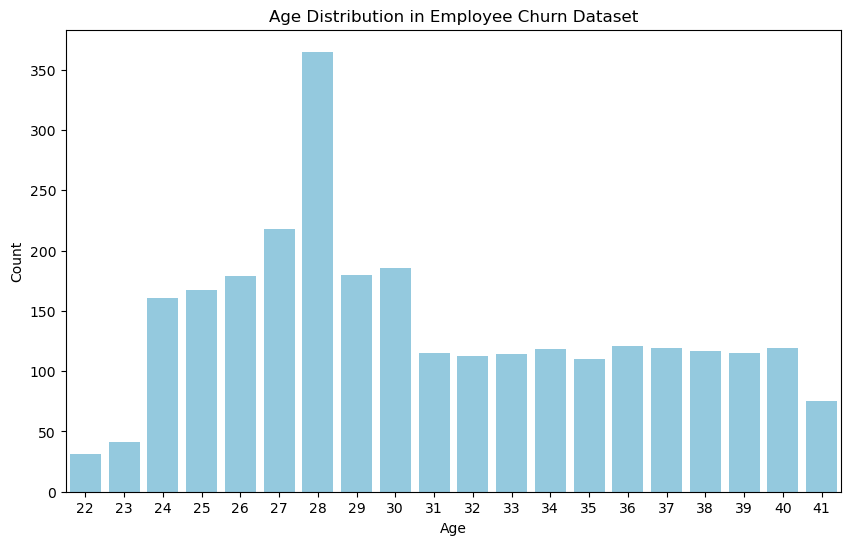

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', color='skyblue')
plt.title('Age Distribution in Employee Churn Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

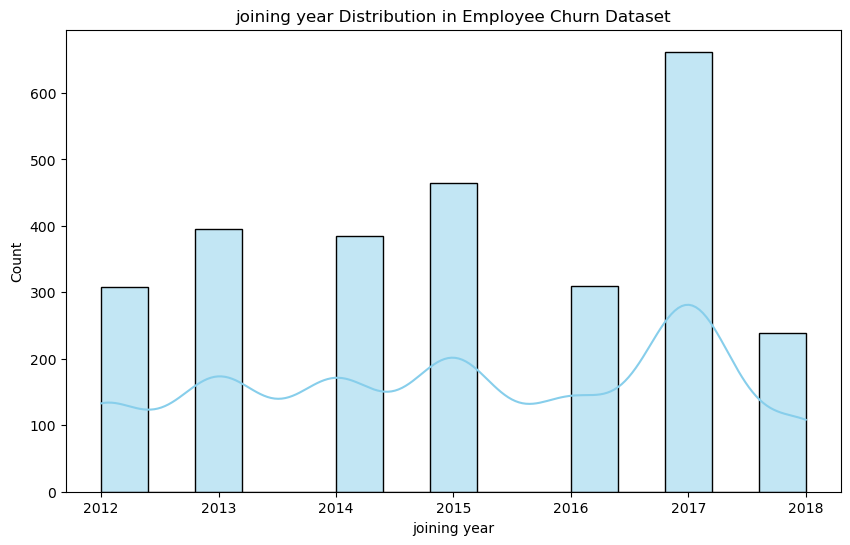

In [29]:
## Python Pandas / Seaborn / Matplotlib Solution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='JoiningYear', bins=15, kde=True, color='skyblue')
plt.title('joining year Distribution in Employee Churn Dataset')
plt.xlabel('joining year')
plt.ylabel('Count')
plt.show()

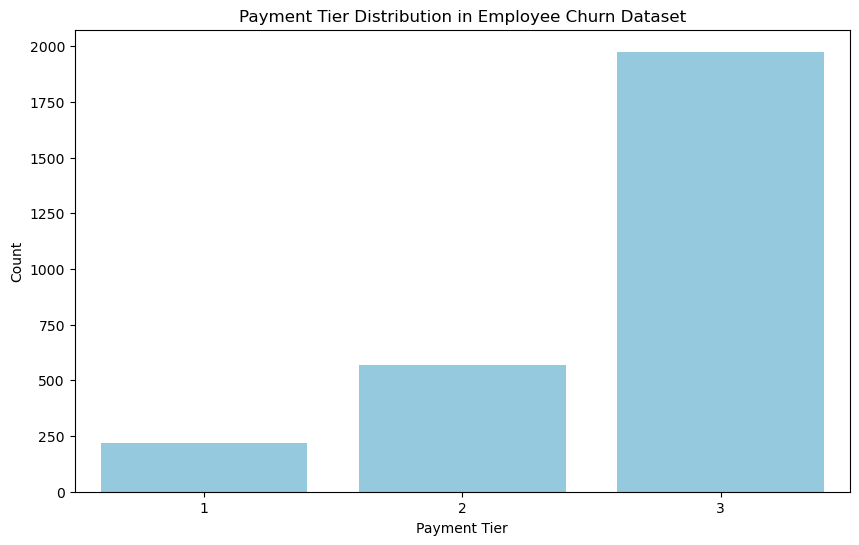

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentTier', color='skyblue')
plt.title('Payment Tier Distribution in Employee Churn Dataset')
plt.xlabel('Payment Tier')
plt.ylabel('Count')
plt.show()

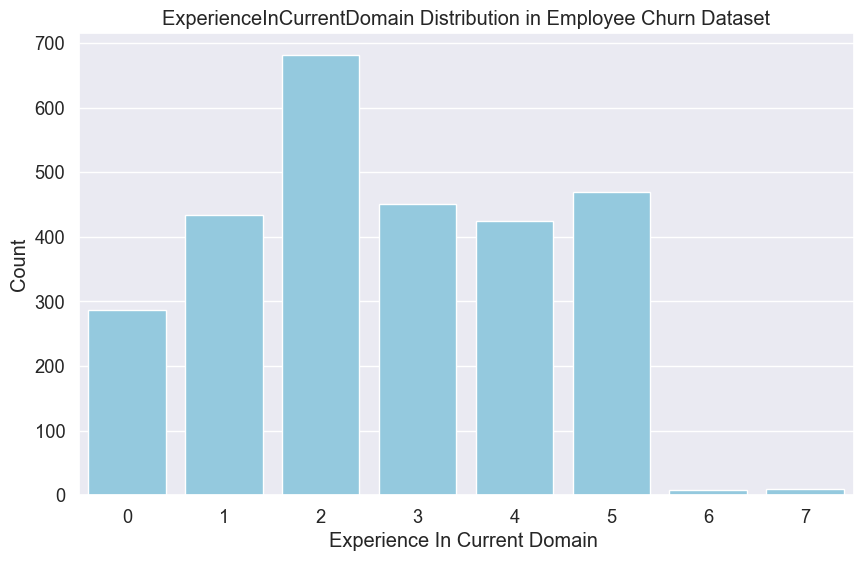

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ExperienceInCurrentDomain', color='skyblue')
plt.title('ExperienceInCurrentDomain Distribution in Employee Churn Dataset')
plt.xlabel('Experience In Current Domain ')
plt.ylabel('Count')
plt.show()

In [34]:
#Most of the employees have a experience in a interval 0-7, most of employees have a experience of 2 followed by 5,3,1,4,0,7,6 yrs

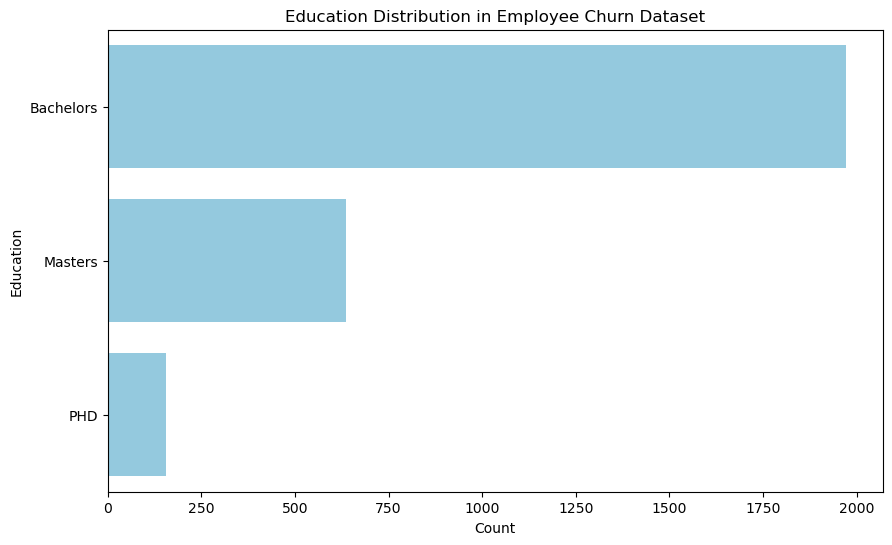

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Education', color='skyblue')
plt.title('Education Distribution in Employee Churn Dataset')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

In [36]:
#most Employees have a bachelor degree followed by masters and phd.

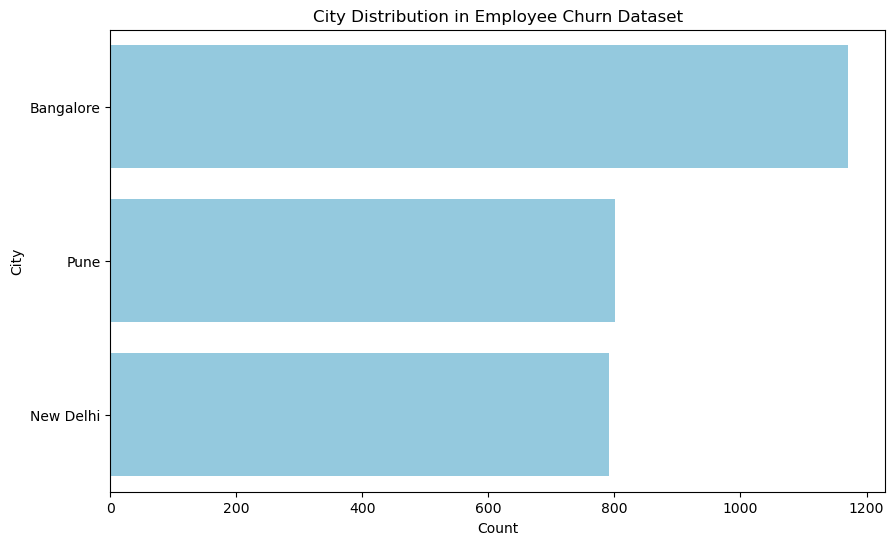

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='City', color='skyblue')
plt.title('City Distribution in Employee Churn Dataset')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

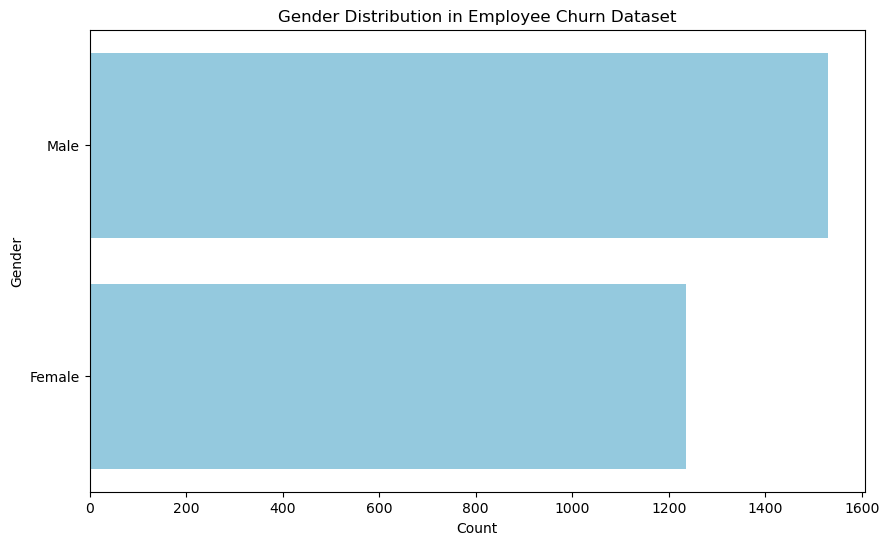

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Gender', color='skyblue')
plt.title('Gender Distribution in Employee Churn Dataset')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

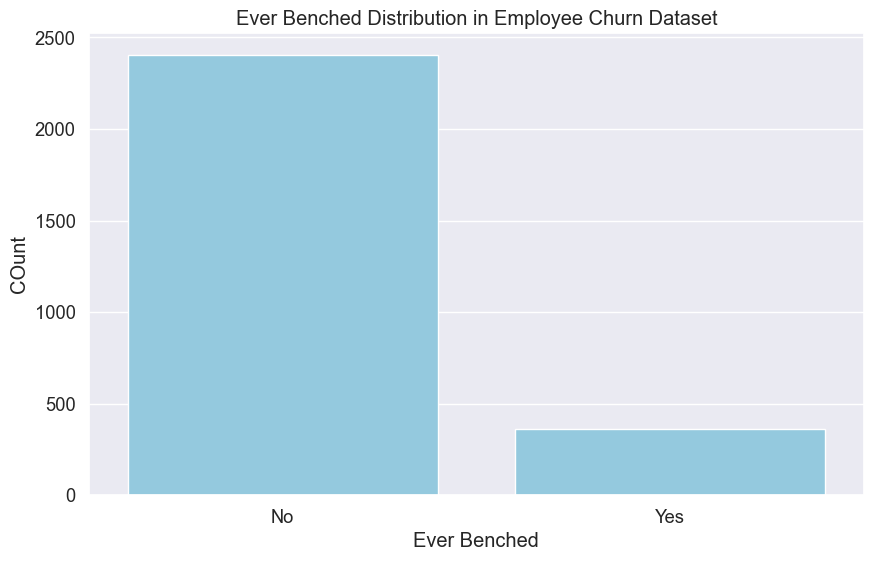

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EverBenched', color='skyblue')
plt.title('Ever Benched Distribution in Employee Churn Dataset')
plt.xlabel('Ever Benched')
plt.ylabel('COunt')
plt.show()

In [42]:
#most of the employees were not benched. only some like 400 were benched.

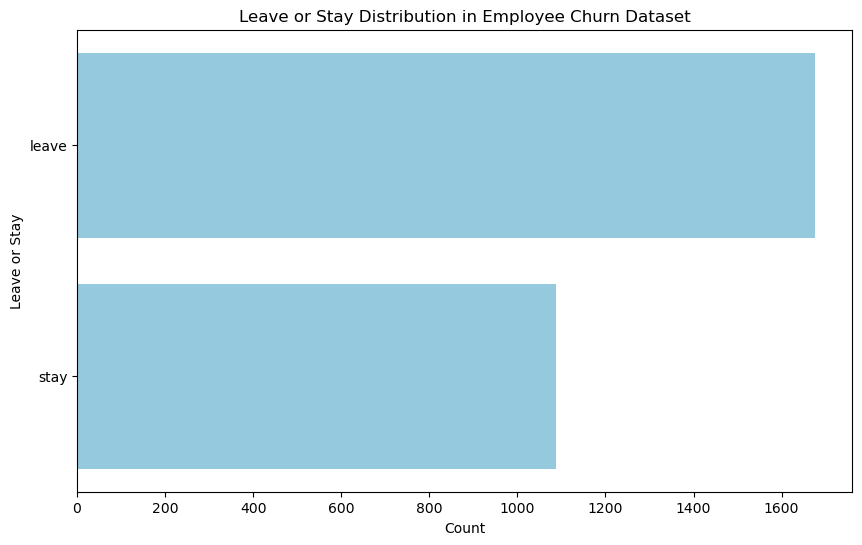

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='LeaveOrNot', color='skyblue')
plt.title('Leave or Stay Distribution in Employee Churn Dataset')
plt.xlabel('Count')
plt.ylabel('Leave or Stay')
plt.show()

#### BI UNIVARIATE

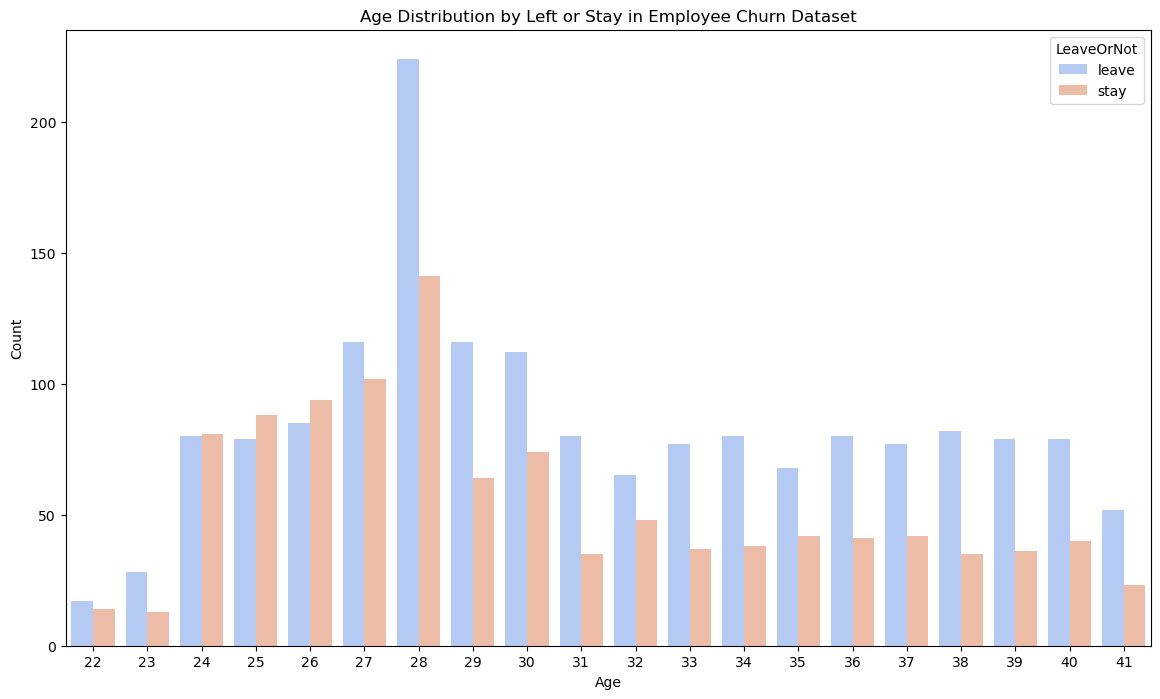

In [44]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Age', hue='LeaveOrNot', palette='coolwarm')
plt.title('Age Distribution by Left or Stay in Employee Churn Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### FIRST COMBINATION OF 2 VARS

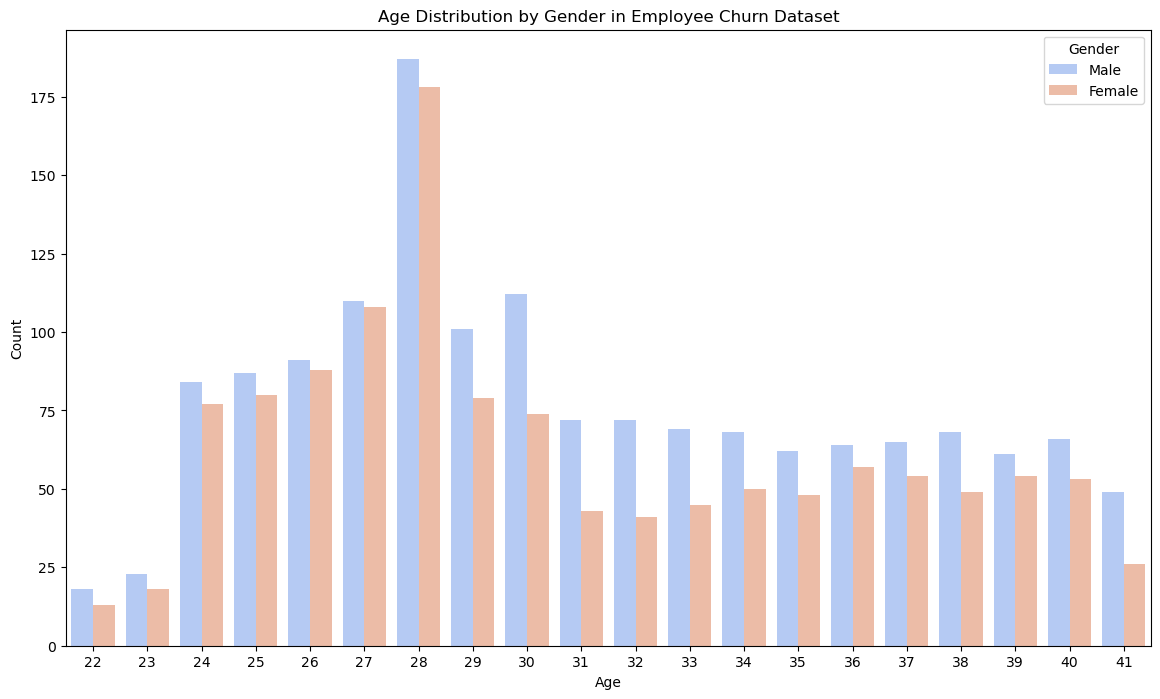

In [45]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Age', hue='Gender', palette='coolwarm')
plt.title('Age Distribution by Gender in Employee Churn Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

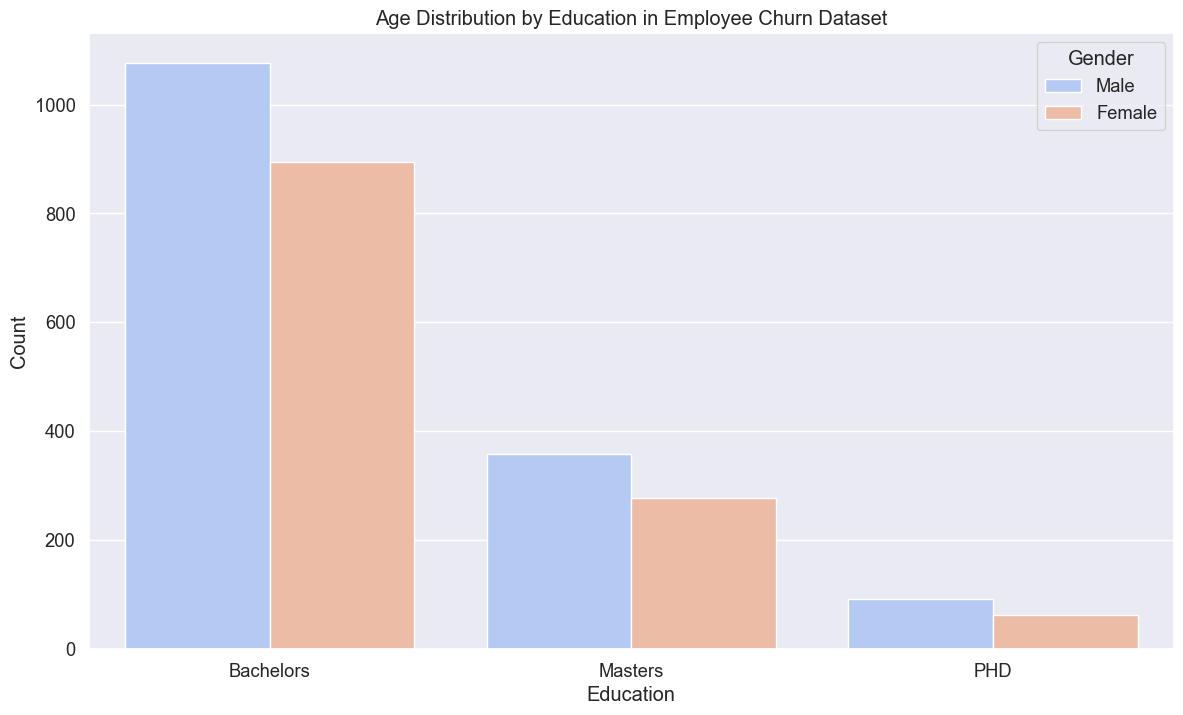

In [114]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Education', hue='Gender', palette='coolwarm')
plt.title('Age Distribution by Education in Employee Churn Dataset')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

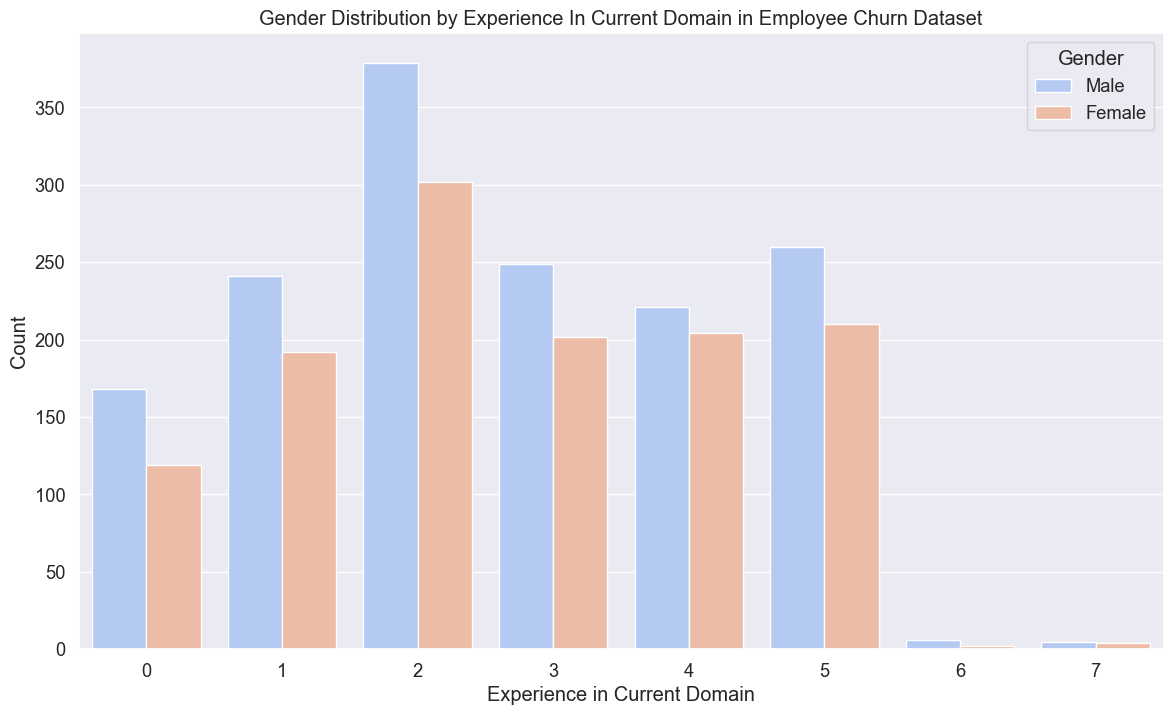

In [115]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='ExperienceInCurrentDomain', hue='Gender', palette='coolwarm')
plt.title('Gender Distribution by Experience In Current Domain in Employee Churn Dataset')
plt.xlabel('Experience in Current Domain')
plt.ylabel('Count')
plt.show()

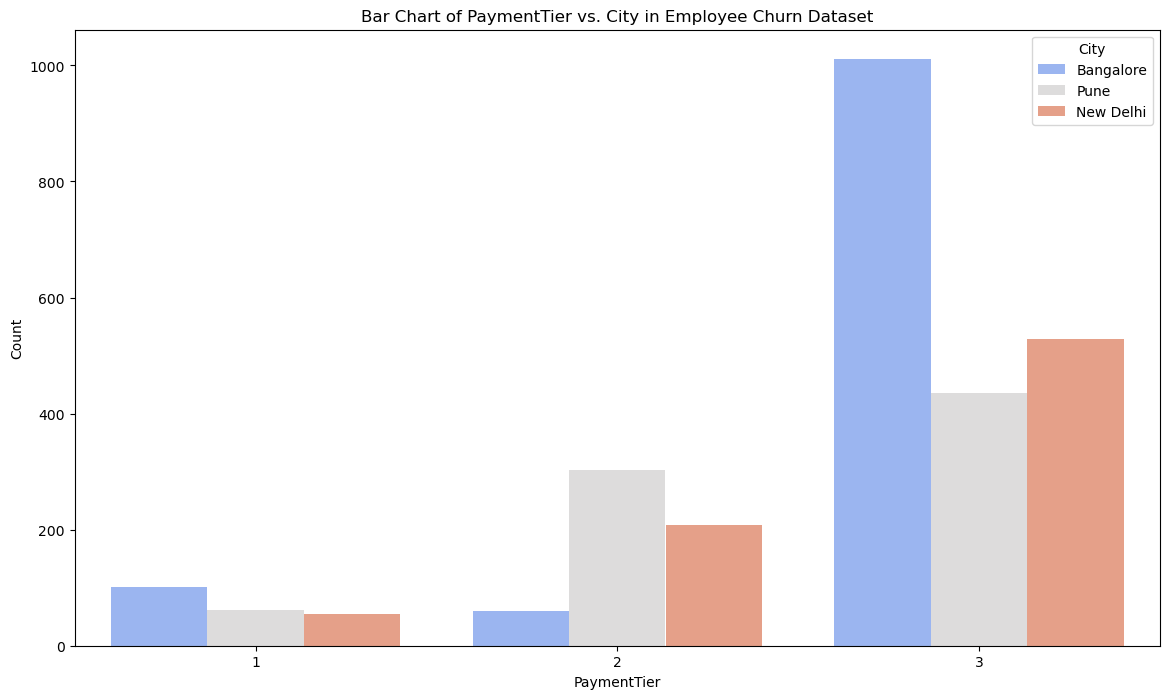

In [48]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='PaymentTier', hue='City', palette='coolwarm')
plt.title('Bar Chart of PaymentTier vs. City in Employee Churn Dataset')
plt.xlabel('PaymentTier')
plt.ylabel('Count')
plt.legend(title='City', loc='upper right')
plt.show()

#### MULTI VARIATE

##### FIRST COMBINATION OF MORE THAN 2 VARS

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` becau

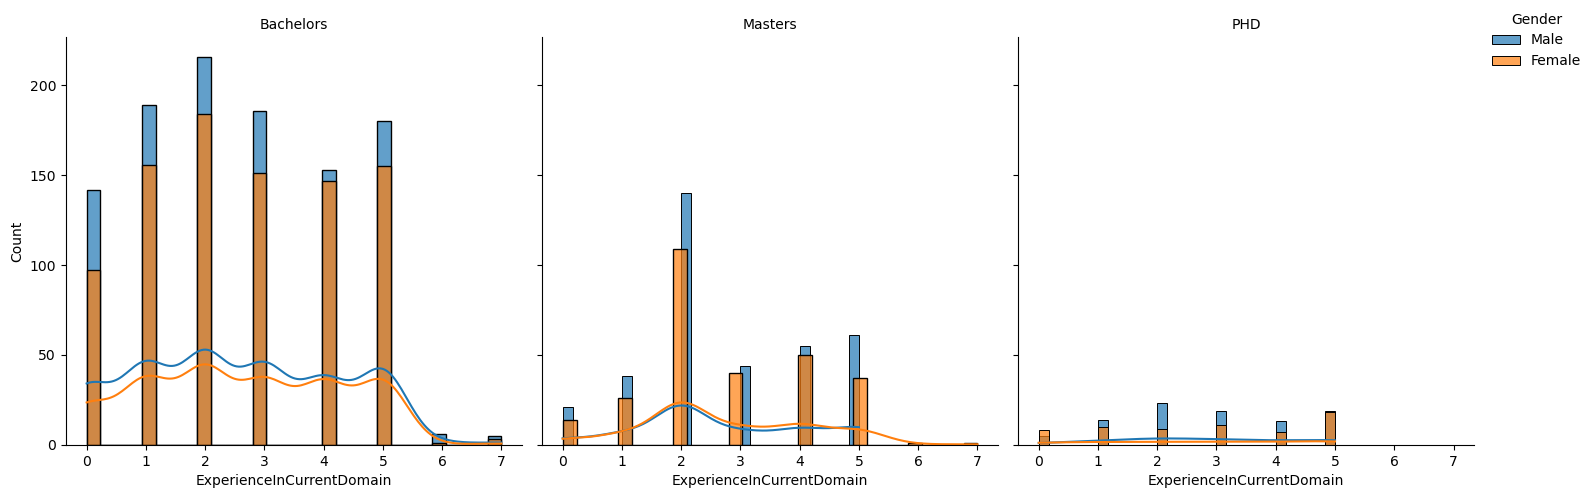

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, col='Education', hue='Gender', height=5)

# Plot histplot for age in each column
g.map_dataframe(sns.histplot, x='ExperienceInCurrentDomain', bins=30, kde=True, palette='pastel', alpha=0.7)

# Set titles for each subplot
g.set_titles(col_template="{col_name}")

# Add labels to axes
g.set_axis_labels("ExperienceInCurrentDomain", "Count")

# Add legend
g.add_legend(title='Gender', loc='upper right')

# Show the plot
plt.show()

### **Feature Engineering**

In [50]:
numeric_vars = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain','PaymentTier']
categorical_vars = ['Education','City','Gender','EverBenched']
features = numeric_vars + categorical_vars

X = df[features]
y = df['LeaveOrNot']

(2764, 8)

In [52]:
X.reset_index(inplace=True,drop=True)

In [53]:
from sklearn.preprocessing import StandardScaler

df_numeric=pd.DataFrame()

scaler = StandardScaler()

df_numeric[numeric_vars] = scaler.fit_transform(X[numeric_vars])

print(df_numeric[numeric_vars].head())

   JoiningYear       Age  ExperienceInCurrentDomain  PaymentTier
0     1.012701  0.596528                  -1.642132     0.583382
1    -1.108637 -0.578112                   0.220853    -2.622319
2    -0.578303  1.379621                  -0.400142     0.583382
3     0.482367 -0.773885                   1.462843     0.583382
4     1.012701 -1.361206                  -0.400142     0.583382


In [57]:
import scipy.sparse
import pandas as pd
import scipy.sparse
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(handle_unknown='ignore')


encoded_categorical = encoder.fit_transform(X[categorical_vars])

encoded_categorical_pd = pd.DataFrame.sparse.from_spmatrix(encoded_categorical)


encoded_feature_names = encoder.get_feature_names_out(categorical_vars)

df_categorical=pd.DataFrame()


df_categorical[encoded_feature_names] = pd.DataFrame(encoded_categorical_pd.values, columns=encoded_feature_names)

df_encoded = pd.concat([df_categorical, df_numeric], axis=1)

In [59]:
df_encoded_feature=df_encoded.columns

### **Spliting the data**

In [61]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

### **Model Creation & Training**

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)

In [66]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Model Evaluation

In [ ]:
y_test_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score


testing_accuracy = accuracy_score(y_pred=y_test_pred, y_true=y_test)
print("Balanced Accuracy:", testing_accuracy)

balanced_testing_accuracy = balanced_accuracy_score(y_pred=y_test_pred, y_true=y_test)
print("Accuracy:", balanced_testing_accuracy)


print("\nConfusion Matrix:")
cm = confusion_matrix(y_pred=y_test_pred, y_true=y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()


print("\nClassification Report:")
print(classification_report(y_pred=y_test_pred, y_true=y_test))


Confusion Matrix:


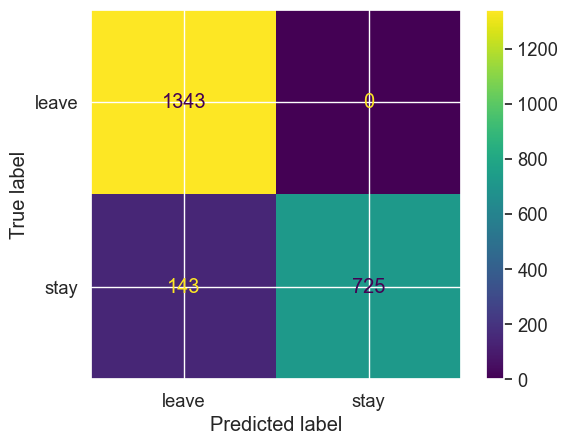

In [116]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_pred=y_train_pred, y_true=y_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

Balanced Accuracy: 0.6781193490054249
Accuracy: 0.6664073164073164

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

       leave       0.74      0.72      0.73       333
        stay       0.59      0.61      0.60       220

    accuracy                           0.68       553
   macro avg       0.66      0.67      0.67       553
weighted avg       0.68      0.68      0.68       553



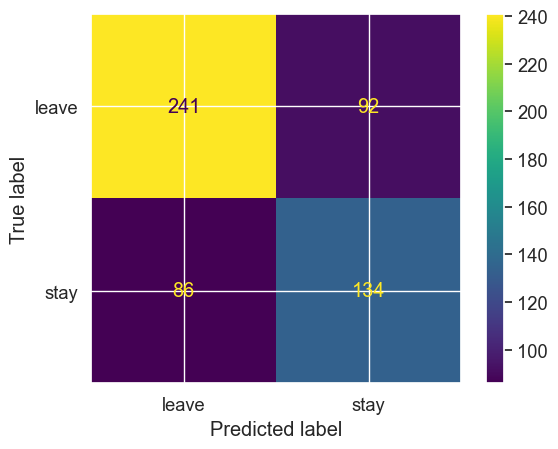

In [117]:
y_test_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score


testing_accuracy = accuracy_score(y_pred=y_test_pred, y_true=y_test)
print("Balanced Accuracy:", testing_accuracy)

balanced_testing_accuracy = balanced_accuracy_score(y_pred=y_test_pred, y_true=y_test)
print("Accuracy:", balanced_testing_accuracy)


print("\nConfusion Matrix:")
cm = confusion_matrix(y_pred=y_test_pred, y_true=y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()


print("\nClassification Report:")
print(classification_report(y_pred=y_test_pred, y_true=y_test))

This is underfit 

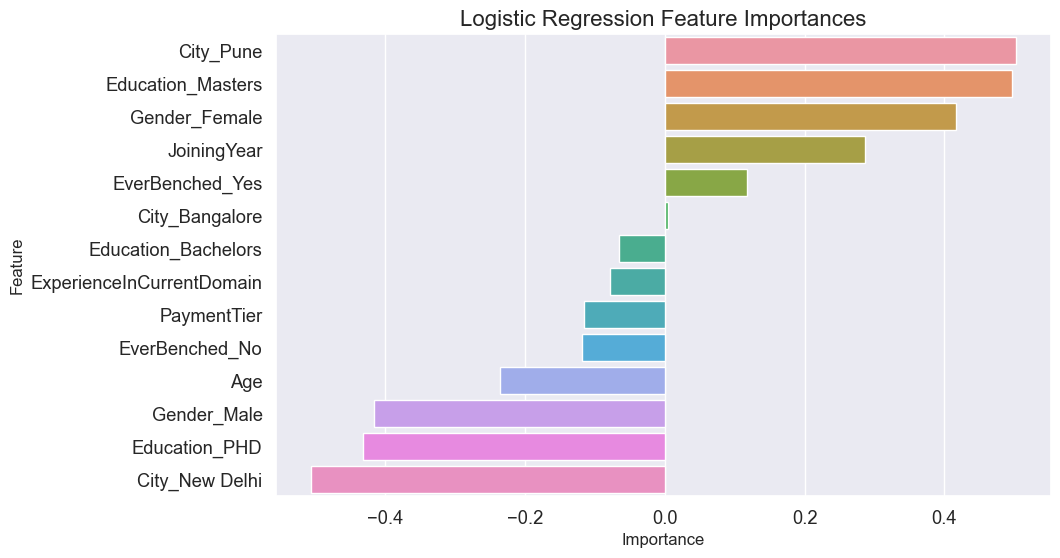

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = clf.coef_[0]
features = df.columns


importance_df = pd.DataFrame({'feature': df_encoded_feature, 'importance': importances})


importance_df = importance_df.sort_values('importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)


sns.barplot(x='importance', y='feature', data=importance_df)


plt.title('Logistic Regression Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)


plt.show()

### **Model Prediction**

In [74]:
JoiningYear = int(input("Enter the joining year: "))
Age = int(input("Enter the age: "))
ExperienceInCurrentDomain = int(input("Enter the experience in current domain: "))
Education = input("Enter the education level (e.g., 'Bachelors', 'Masters'): ")
City = input("Enter the city: ")
PaymentTier = int(input("Enter the payment tier (1, 2, or 3): "))
Gender = input("Enter the gender (e.g., 'Male', 'Female', 'Other'): ")
EverBenched = input("Has the employee ever been benched? (Yes or No): ")


user_data = {
    'JoiningYear': [JoiningYear],
    'Age': [Age],
    'ExperienceInCurrentDomain': [ExperienceInCurrentDomain],
    'Education': [Education],
    'City': [City],
    'PaymentTier': [PaymentTier],
    'Gender': [Gender],
    'EverBenched': [EverBenched]
}


df_test = pd.DataFrame(user_data)



Enter the joining year: 2012
Enter the age: 25
Enter the experience in current domain: 2
Enter the education level (e.g., 'Bachelors', 'Masters'): Masters
Enter the city: Pune
Enter the payment tier (1, 2, or 3): 2
Enter the gender (e.g., 'Male', 'Female', 'Other'): Male
Has the employee ever been benched? (Yes or No): Yes


In [94]:
features = ['Age', 'Education', 'ExperienceInCurrentDomain','PaymentTier']

In [95]:
X = df[features]

In [96]:
df_numeric_test=pd.DataFrame()


df_numeric_test = pd.DataFrame(scaler.transform(df_test[numeric_vars]),columns=numeric_vars)


print(df_numeric_test[numeric_vars].head())

   JoiningYear       Age  ExperienceInCurrentDomain  PaymentTier
0    -1.638972 -1.165432                  -0.400142    -1.019468


In [98]:
encoded_categorical_test = encoder.transform(df_test[categorical_vars])
encoded_categorical_test_pd = pd.DataFrame.sparse.from_spmatrix(encoded_categorical_test)

encoded_feature_names_test = encoder.get_feature_names_out(categorical_vars)

df_categorical_test = pd.DataFrame(encoded_categorical_test_pd.values, columns=encoded_feature_names)

In [101]:
df_encoded_test = pd.concat([df_categorical_test,df_numeric_test], axis=1)

In [103]:
prediction = clf.predict(df_encoded_test)

In [105]:
if prediction[0] == 'leave':
    print("Based on the provided information, the Employee will leave")
else:
    print("Based on the provided information,the employee will not leave.")

Based on the provided information, the Employee will leave


In [119]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
                         
from sklearn.svm import SVC
svc = SVC(random_state=42)
                         
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [120]:
# Model Evaluation
for name, clf in classifiers.items():
    print(f"Model: {name}")
    # Model Training
    clf.fit(X_train, y_train)

    # Model Evaluation
    y_train_pred = clf.predict(X_train)

    # Evaluate the classifier
    accuracy = accuracy_score(y_train, y_train_pred)
    print("Accuracy:", accuracy)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_train, y_train_pred))

    # Confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))

    print("\n-------------------------------------\n")

Model: Logistic Regression
Accuracy: 0.6834011759384894

Classification Report:
              precision    recall  f1-score   support

       leave       0.70      0.85      0.77      1343
        stay       0.65      0.43      0.51       868

    accuracy                           0.68      2211
   macro avg       0.67      0.64      0.64      2211
weighted avg       0.68      0.68      0.67      2211


Confusion Matrix:
[[1142  201]
 [ 499  369]]

-------------------------------------

Model: Random Forest
Accuracy: 0.9353233830845771

Classification Report:
              precision    recall  f1-score   support

       leave       0.92      0.97      0.95      1343
        stay       0.95      0.88      0.91       868

    accuracy                           0.94      2211
   macro avg       0.94      0.92      0.93      2211
weighted avg       0.94      0.94      0.93      2211


Confusion Matrix:
[[1307   36]
 [ 107  761]]

-------------------------------------

Model: SVM
Accuracy:

### **Model Training Accuracy Report**

Model: Random Forest
Accuracy: 0.94

Model: Decision Tree
Accuracy: 0.94

precision recall f1 score confusion is almost same for both.

decision tree and random forest is a good fit but i think according to the requirements i would choose Random forest more.